# 1. Perkenalan


Nama : Gentur Herlambang

Batch : FTDS-017-RMT

Dataset : Data Serangan Jantung

Objective : Dapat membuat model yang dapat meprediksi apkah sesorang akan meninggal karena serangan jantung , dan melihat korelasi antara beberapa keadaan seperti merokok, diabetes, darahtinggi memiliki korelasi kepada tingkat kematian serangan jantung. model yang di gunakanm ada 2 yaitu random forest dan adaboost. Sedangkan untuk parametert evaluasi akan menggunakan recall yang meinnamilisir angka false negatifnya. 

Querry yang di gunakan   

 select 

 * 

  FROM `ftds-hacktiv8-project.phase1_ftds_017_rmt.heart-failure` 
 
 
  LIMIT 1000

# 2. Import Libraries

Berikut ini adalah libraries python yang di gunakan

In [3]:
import pandas as pd ## Import libararies yang akan di pakai
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix , classification_report ,recall_score
from sklearn.model_selection import RandomizedSearchCV
import pickle
import json

# 3. Data Loading

Pada bagian ini akan mengload data ke notebook

In [4]:
df=pd.read_csv(r'K:\Hack8 Data Science\Phase 1\GC\GC 3\h8dsft_P1G3_Gentur_Herlambang.csv') ##Menload data 
heart=df.copy() # Mnegocpy agar data original aman

FileNotFoundError: [Errno 2] No such file or directory: 'K:\\Hack8 Data Science\\Phase 1\\GC\\GC 3\\h8dsft_P1G3_Gentur_Herlambang.csv'

Menapilkan 10 data pertama dan terakhir

In [ ]:
heart.head(10) # 10 data pertama

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [ ]:
df.agg(['min', 'max'])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
min,40.0,0,23,0,14,0,25100.0,0.5,113,0,0,4,0
max,95.0,1,7861,1,80,1,850000.0,9.4,148,1,1,285,1


In [ ]:
heart.tail(10) # 10 data terakhir

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


cek missing value

In [ ]:
heart.isnull().sum() # Check null value

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

tidak ada null value

cek bentuk data

In [ ]:
heart.info() # check bentuk data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Mengganti nama target karena terlau panjang

In [ ]:
heart.rename(columns={'DEATH_EVENT':'death'}, inplace=True) # nama terget kepanjangan

# 4. EDA

Pada bagian ini akan ekspolrasi data secara sederhana

Pertma kita lihat survival rate data

Text(0.5, 1.0, 'survive rate')

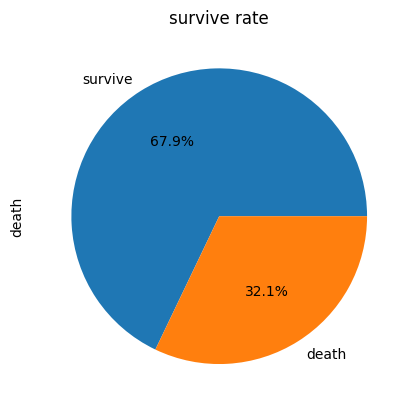

In [ ]:
heart['death'].value_counts().plot.pie(labels = ['survive','death'],autopct='%1.1f%%') # cek survival rate
plt.title('survive rate')

32% orang meninggal karena serangan jantung

Kita lihat persebaran data

In [ ]:
def central_plot(df,variable): ## membuat variabel central tendencyes
    print(variable) 
    print ("median:",df[variable].median())
    print ("mean:",df [variable].mean())
    print ("mode:",df [variable].mode()[0])
    print ("skew:",df [variable].skew())
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title('central tendencies')
    

Pertama kita cek umur data

age
median: 60.0
mean: 60.83389297658862
mode: 60.0
skew: 0.4230619067286355


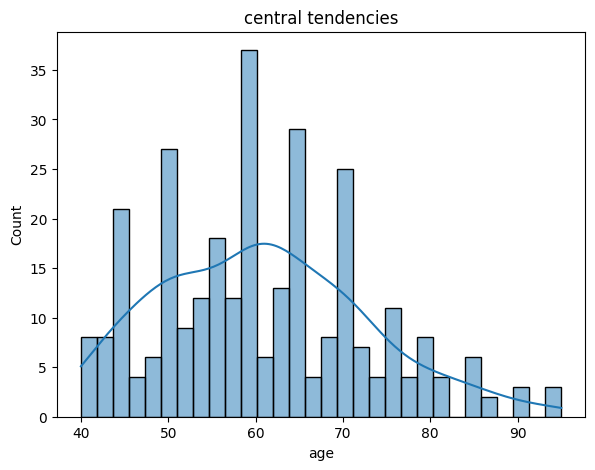

In [ ]:
central_plot(heart, 'age') # cek persebaran umur

Range umur data berkisar dari 40 tahun sampai 90 tahun dengan rat-rata umur nya ada di 60 tahun

Selanjutnya akan melihat hubungan antara umur dengan kematian

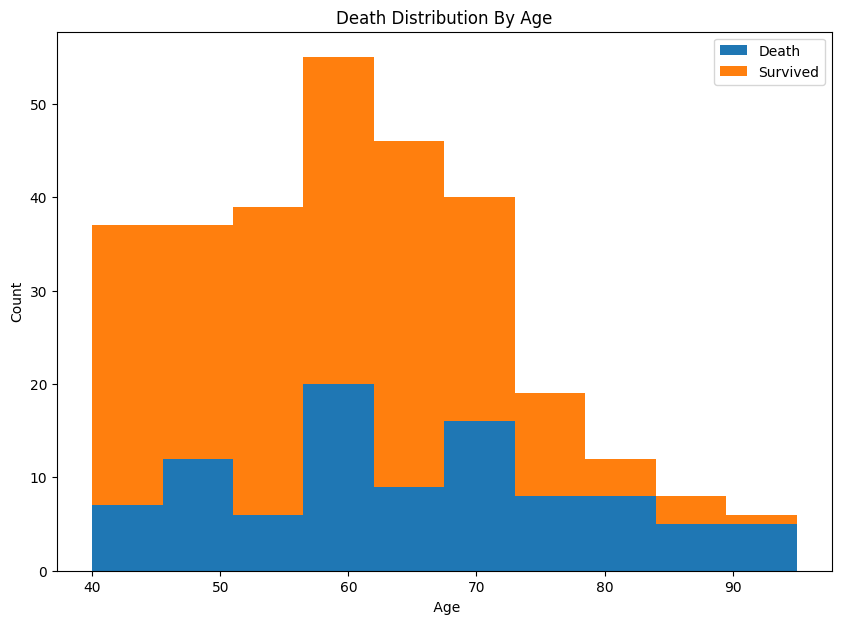

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))  # melihat umur dengan kematian
age_died = heart[heart['death']==1]['age']
age_survive = heart[heart['death']==0]['age']
plt.hist(x = [age_died, age_survive], stacked = True , bins='auto')
plt.xlabel(' Age')
plt.ylabel('Count')
plt.title('Death Distribution By Age')
plt.legend(['Death','Survived']);

Kematian terbanyak terjadi antara umur 60-70 tahun , tetapi di atas 70 tahun ratio antara yang hidup dan meninggal semakin menurun

Selanjutnya akan mengecek waktu kontrol data

time
median: 115.0
mean: 130.2608695652174
mode: 187
skew: 0.12780264559841178


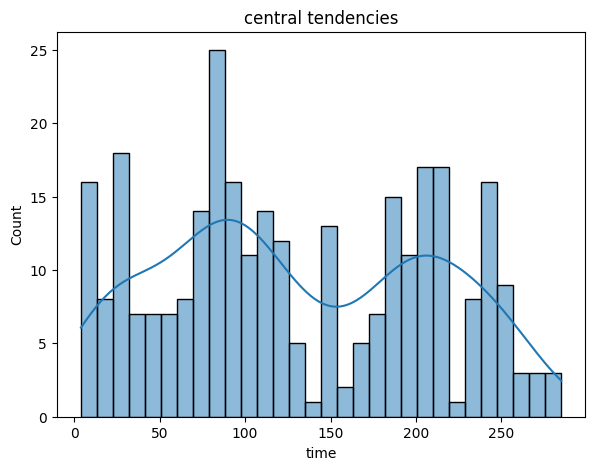

In [ ]:
central_plot(heart, 'time') # cek waktu kontrol

Sebagian besar cek rutin anatara 90-100 hari dan 200 hari , ini menggabrakan keadaan pasien ada yang di cek tiap 3 bulan dan 6 bulan sekali.

Kemudian akan melihat persebaran gender

Text(0.5, 1.0, 'gender')

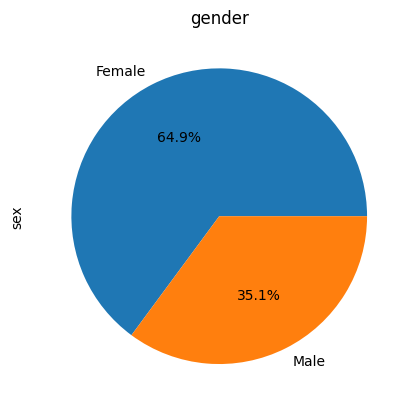

In [ ]:
heart['sex'].value_counts().plot.pie(labels = ['Female','Male'],autopct='%1.1f%%') # persebaran gender
plt.title('gender')

Overall pasien di dominasi oleh wanita sekitar 2:1 di banding dengan Pria

Selanjutnya melihat persebaran kematian berdasrkan gender

C:\Users\parma\AppData\Local\Temp\ipykernel_13636\1357349534.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_survive = male[heart["death"]==0]
C:\Users\parma\AppData\Local\Temp\ipykernel_13636\1357349534.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_died = male[heart["death"]==1]
C:\Users\parma\AppData\Local\Temp\ipykernel_13636\1357349534.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_survive = female[heart["death"]==0]
C:\Users\parma\AppData\Local\Temp\ipykernel_13636\1357349534.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_died = female[heart["death"]==1]
C:\Users\parma\AppData\Local\Temp\ipykernel_13636\1357349534.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = [len(male[heart["death"]==0]),len(male[heart["death"]==1]),
C:\Users\parma\AppData\Local\Temp\ipykernel_1363

Text(0.5, 1.0, 'Survive Rate By Gender')

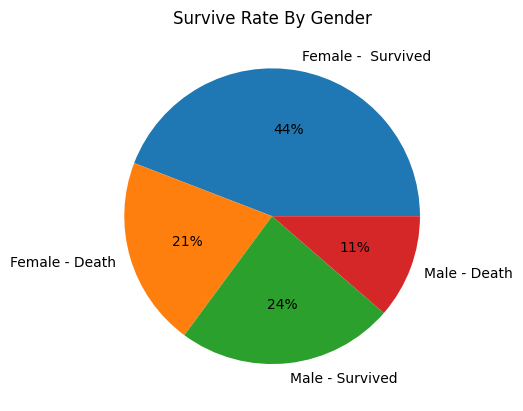

In [ ]:
male = heart[heart["sex"]==1]  # survive rate by gender
female = heart[heart["sex"]==0]
male_survive = male[heart["death"]==0]
male_died = male[heart["death"]==1]
female_survive = female[heart["death"]==0]
female_died = female[heart["death"]==1]
labels = ["Female -  Survived", "Female - Death",'Male - Survived','Male - Death']
values = [len(male[heart["death"]==0]),len(male[heart["death"]==1]),
         len(female[heart["death"]==0]),len(female[heart["death"]==1])]
plt.pie(values, labels = labels , autopct='%.0f%%' )
plt.title('Survive Rate By Gender')

overall wanita dan pria memiliki kesmp[atan yang sama untuk survive

Di data ada beberapa keadaan khusus , kita akan melihat bagaimana hubungan keadaan tersebut terhadap mortalitasnya.

C:\Users\parma\AppData\Local\Temp\ipykernel_13636\2764460764.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\parma\AppData\Local\Temp\ipykernel_13636\2764460764.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)
C:\Users\parma\AppData\Local\Temp\ipykernel_13636\2764460764.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,3)


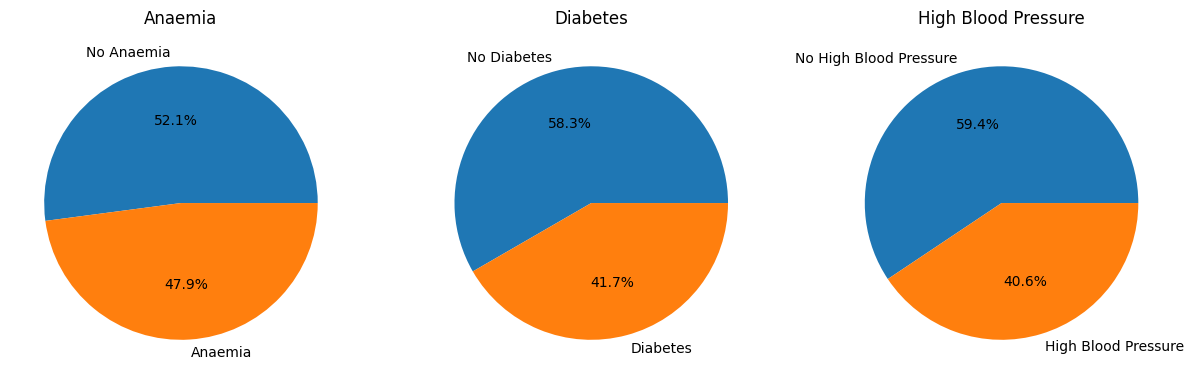

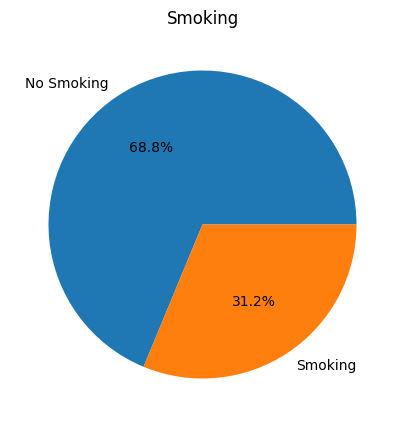

In [ ]:
anaemia = heart[heart['death'] == 1]['anaemia'].value_counts() # mortalitas keadaan khusus
diabetes = heart[heart['death'] == 1]['diabetes'].value_counts()
hbp = heart[heart['death'] == 1]['high_blood_pressure'].value_counts()
smoke = heart[heart['death'] == 1]['smoking'].value_counts()
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,3,1)
plt.pie(anaemia,labels = ['No Anaemia','Anaemia'],autopct='%1.1f%%'
)
plt.title('Anaemia');
plt.subplot(1,3,2)
plt.pie(diabetes,labels = ['No Diabetes', 'Diabetes'],autopct='%1.1f%%'
       )
plt.title('Diabetes');
plt.subplot(1,3,3)
plt.pie(hbp,labels = ['No High Blood Pressure','High Blood Pressure'],autopct='%1.1f%%'
       )
plt.title('High Blood Pressure');
ax,fig = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))
plt.subplot(1,1,1)
plt.pie(smoke,labels = ['No Smoking','Smoking'],autopct='%1.1f%%'
        )
plt.title('Smoking');

Ternata orang yang merokok memiliki tingkat kematian yang normal , sedangkan orang yang memiliki anaemia, diabetes , dan tekanan darah tinggi memiliki tingkat mortalitas yang lebih tinggi.

# 5. Data Preprocessing

Pada data procesing kali ini karena model yang akan di gunakan berdasar pada decision tree yang mampu memilih fitur dan tahan terhadap outliar 

## Menetukan X dan y

In [ ]:
X = heart.drop(['death'], axis=1) ## Mendifinisikan X(fitur) dan y (target)
y = heart['death']

karena model ingin memprediksi kemungkinan kematian maka kematian kita masukan sebagai target (y)

## Tran - Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36) ## split data ujian 30%

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (239, 12)
Test Size  :  (60, 12)


Membagi 75% akan di gunakan untuk training dan 25% untuk test.

## Split Numeric and Categorical

In [ ]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist() ## Pembagian Numeric and Categorical
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
Cat Columns :  []


## Feature Scaling

In [ ]:
scaler = MinMaxScaler() ## scale numeric
scaler.fit(X_train) # hanya Train

X_train_num_scaled = scaler.transform(X_train)
X_test_num_scaled = scaler.transform(X_test)

# 6. Model Defination

## 1.Hyperparameter Selection

Akan menggunakan random search untuk menetukan hyperparameter yang teapt.

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)] # menentukan hyperparameter
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}

Cek persebaran target

In [ ]:
heart['death'].value_counts() ## cek persebaran

0    203
1     96
Name: death, dtype: int64

Karena jumlah data target tidak imbang akan di gunakan stratified k fold agar seimabng

In [ ]:
skfold=StratifiedKFold(n_splits=5) #membagi data menjadi 5 bagian dengan imbang
a=X.copy()
b=y.copy()

In [ ]:
rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(),  # mencari value hyperparameter
                                 param_distributions=random_grid,
                                 n_iter=50,
                                 cv=skfold, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='recall')
rf_randomcv.fit(a, b)
rf_randomcv.best_params_ # best hyperparameter value

c:\Users\parma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 450,
 'criterion': 'entropy'}

kemudian kita akan melihat konfigurasi hyperparameter yang di dapat

## 2. Model Load

### 1. Random Forest 

Mendifinisikan model untuk Random forest dengan heyperparameter yang sudah di cari

In [ ]:
rf=RandomForestClassifier(n_estimators=200, criterion= 'gini' ,max_depth=890,min_samples_split=5,min_samples_leaf=1, max_features= 'sqrt',random_state= 42)  # mendefinisikan model dengan value hyperparameter yang sudah dicari



### 2. Adaboost

Mendifinisikan model untuk Adaboost dengan heyperparameter yang sudah di cari

In [ ]:
ada= AdaBoostClassifier(RandomForestClassifier(n_estimators=200, criterion= 'gini' ,max_depth=890,min_samples_split=5,min_samples_leaf=1, max_features= 'sqrt',random_state= 42), algorithm="SAMME.R", learning_rate=0.7,random_state=42)  # mendefinisikan model dengan value hyperparame



# 7. Model Trainig

## 1. Random Forest 

In [ ]:
rf.fit(X_train, y_train) # melatih model dengan train 


RandomForestClassifier(max_depth=890, min_samples_split=5, n_estimators=200,
                       random_state=42)

## 2. Adaboost

In [ ]:
ada.fit(X_train, y_train) # melatih model dengan train 

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=890,
                                                    min_samples_split=5,
                                                    n_estimators=200,
                                                    random_state=42),
                   learning_rate=0.7, random_state=42)

# 8. Model Evaluation

Untuk model evaluation akan berfokus pada nilai recall karena kita igin meminimalisir angka false negatif nya atau orang yang kita prediksi selamat tetapi kenyataanya meninggal , sehingga kita bisa lebih tepat dan siap dalam mempersdiapkan keadaan.

## 1. Random Forest 

Pertama kita akan mengevaluasi random forest 

In [ ]:
y_pred_train_rf = rf.predict(X_train)  ## Ujian // prediksi antara tarin-set dengan test-set
y_pred_test_rf = rf.predict(X_test)

In [ ]:
print(' score for random forest') # evaluasi randomforest
print(' score train : ',recall_score(y_train,y_pred_train_rf))
print(' score test : ',recall_score(y_test,y_pred_test_rf))
print(classification_report(y_test, y_pred_test_rf))


 score for random forest
 score train :  0.9629629629629629
 score test :  0.6666666666666666
              precision    recall  f1-score   support

           0       0.90      0.96      0.92        45
           1       0.83      0.67      0.74        15

    accuracy                           0.88        60
   macro avg       0.86      0.81      0.83        60
weighted avg       0.88      0.88      0.88        60



Overall unutk model random forest termasuuk overfit dan masih banyak ruang untuk improvement karena nilai  recall test nya berbeda lumayan cukup jauh sekiatr 30% di sekitar 66% di banding dengan test nya yang berkisar 96%

Kemudian kita akan melihat confusion matrix dari train dan test model random forest

Text(0.5, 1.0, 'Confusion Matrix Random Forest Train')

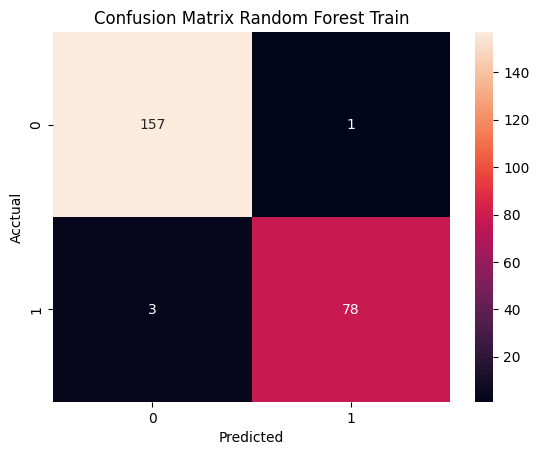

In [ ]:
rf_train_mx=confusion_matrix(y_train,y_pred_train_rf) # cek nonfusion matrix

sns.heatmap(rf_train_mx,annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Acctual')
plt.title("Confusion Matrix Random Forest Train") 

Untuk hasil train nya cukup memuaskan dengan nilai recall sekitar 96%

Text(0.5, 1.0, 'Confusion Matrix Random Forest Test')

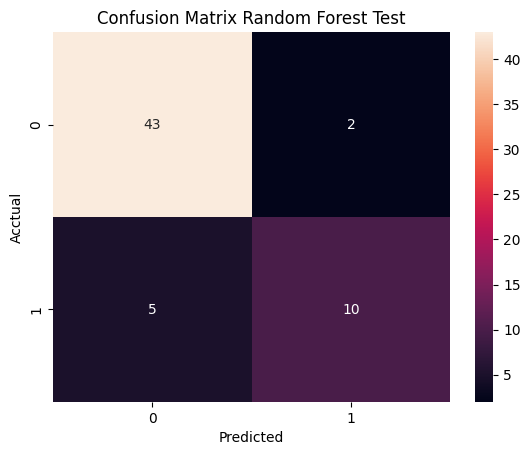

In [ ]:
rf_test_mx=confusion_matrix(y_test,y_pred_test_rf) # cek nonfusion matrix

sns.heatmap(rf_test_mx,annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Acctual')
plt.title("Confusion Matrix Random Forest Test") 

berbeda dengan hasil yrain hasil test nya masih bisa di anggap kurang karena hasil recallnya berkisar di 66%

## 2. Adaboost

Selanjutnya  kita akan mengevaluasi Adaboost

In [ ]:
y_pred_train_ada = ada.predict(X_train)  ## Ujian // prediksi antara tarin-set dengan test-set
y_pred_test_ada = ada.predict(X_test)

In [ ]:
print(' score for ada boost') # evalusai model adaboost
print(' score train : ',recall_score(y_train,y_pred_train_ada ))
print(' score test : ',recall_score(y_test,y_pred_test_ada ))
print(classification_report(y_test, y_pred_test_ada))

 score for ada boost
 score train :  1.0
 score test :  0.6666666666666666
              precision    recall  f1-score   support

           0       0.90      0.96      0.92        45
           1       0.83      0.67      0.74        15

    accuracy                           0.88        60
   macro avg       0.86      0.81      0.83        60
weighted avg       0.88      0.88      0.88        60



Overall hasil adaboost masih mirip dengan hasil random forest, sama model overfitt bagus sewaktu melakukan train tetapi pada saat test performanya masih kurang

Selanjutnya akan melihat confusin matrix dari train-test model adaboost.

Text(0.5, 1.0, 'Confusion Matrix Adaboost Train')

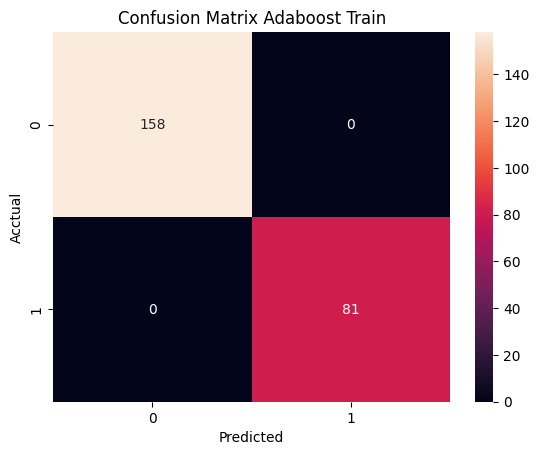

In [ ]:
ada_train_mx=confusion_matrix(y_train,y_pred_train_ada)# cek nonfusion matrix

sns.heatmap(ada_train_mx,annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Acctual')
plt.title("Confusion Matrix Adaboost Train") 

Dimodel ada bosst bagian training bisa do bilang sangat bagus akrena bisa memporediksi dengan teapt.

Text(0.5, 1.0, 'Confusion Matrix Adaboost Test')

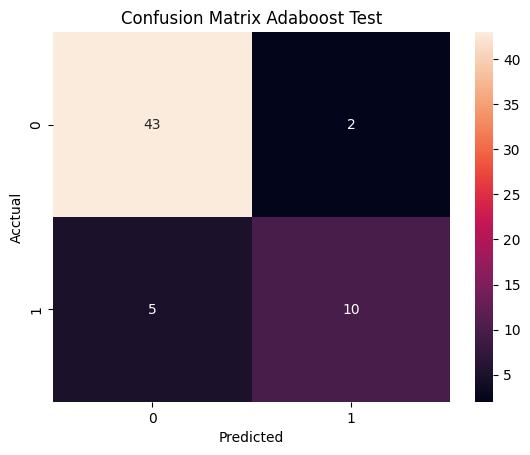

In [ ]:
ada_test_mx=confusion_matrix(y_test,y_pred_test_ada)# cek nonfusion matrix

sns.heatmap(ada_test_mx,annot=True,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Acctual')
plt.title("Confusion Matrix Adaboost Test") 

Sedangkan pada bagian traion model adaboost juga memiliki kendala yang sama dengan randomforest yaitu masih belum bisa meminalisir false negatif dengan tepat yang menyebakan nilai recall 66%

# 9. Model Saving

Kita akan mensave bagian yang di butuhkan untuk menginfarance model kita

In [ ]:
with open('rf.pkl', 'wb') as file_1: # saving model
  pickle.dump(rf, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('list_num_cols.txt', 'w') as file_3:
  json.dump(num_columns, file_3)



# 10. Model Inference

Infarance model terdapat di halaman hugging face (https://huggingface.co/spaces/Gentur/rmt-17-gc3-heart-prediction)

# 11.Pengambilan Kesimpulan

Pertama persebaran umur pasien adalah dari 40 tahun hingga umur 90 tahun dengan rata-rata umur 60 tahun , Untuk tes rutin sebagain besar terbagi jadi 2 kelompok yang pertama setiap 90-100 hari atau setiap 3 bulan sekali dan setiap 200 hari sekali atau setiap 6 bulan sekali . Untuk mortalitas berdasarkan umur sebagain besar terjadi pada umur 60 dan 70 tahun tetapi denagan bertambahnya umur di atas 70 tahun rasio tingkat mortalitas naik apa bila di bandingkan umur di bawahnya.


Sedangkan untuk mortalitas pria dan Wanita memiliki persebaran yang merata , dapat di katakana bahwa pria dan Wanita memiliki peluang untuk hiudp yang sama , tetapi ini berbeda dengan oaring yang memiliki keadaan khusus. Orang yang memiliki anaemia memiliiki tingkat mortalitas 16% lebih tinggi di baning dengan yang tidak , juga sama bagi orang yang menderita diabetes memiliki angka kematian 10% lebih tinggi , dan juga orang yang memiliki darah tinggi meiliki kemungkinan meninggal 9% lebih tinggi ,akan tetapi ini tidak berlaku bagi orang yang merokok karena tingkat mortalitasnya cenderung sama .

Untuk pembuatan model menggunakan 2 jenis model yang pertama adalah Random forest dan yang kedua adalah Adaboost classifier kedua model ini akan di evaluasi dan di bandingkan , hasil yang terbaik akan di guanakan untuk infarance. Berdasrkan hasil kedua model , kedu-duanya dikatakan overfitt di mana hasil train lebih baik di bandingkan hasil test .

Bebrapa rekomendasi untuk improve model:
- membuat tarin test split yang lebih berimbang , perbanyak test dan perkecil train
- melakukan normalisai pada data.



# Conceptual Problems

## 1.Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Latar belakang di kemabngnya metode bagging adalah untuk mengurangi varian yang di gunakan dalam model untuk meningkatkan performa dan akurasi dari model ,cara kerja bagging adalah dengan membuat beberapa model yang melakukan perhitungan secara pararel kemudian untuk menagbil keputusan akan di lakukan voting dari masing-masing model yang sudah di buat .

## 2.Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Perbedaaan antara random forest dengan Adaboost adalah :
- data sampling  : Di randomforest sample data yang di gunakan adalah random , sedangkan di Adaboost sample data yang di gunakan untuk taring selanjutnya memiliki  beban yang lebih tinggi di banding dengan data sebeluumnya.
- Weight (beban) : Apabila di random forest hasil pilihan masing-masing mdoel pohon memiliki bobot yang sama , sedangkan di Adaboost ada model memiliki hiraki beban pilihan yang lebih tinggi di banding model lainya.
- Urutan model : Pada randomforest urutan model yang yang di bangun memiki pilihan independent di banding model lainya , sedangkan Adaboost pilihan keputusan model tergabtung dari hasil model sebelumnya